# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

When runnig the simulation, a new ipython window opens with a visualization of the cab scenario. Here, a grid pattern of streets is show from a bird's-eye view. Each intersection has a indication of a traffic light which gives one of the directions (horizontal, vertical) a green light and the other a red light. There are other cars moving from one position to the next, which is one of three: straight, right, left. They stop on red lights and move when traffic lights are green.
The white car is not moving at all.
In the previous window, the received rewards are shown. The cab receives negative rewards most of the time because it does not move. Occasionally it receives a positive reward because the traffic light is red and it was correct to not move.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**   
**agent.py**   
1. verbose: Default=False. If True, addition information is printed into command line prompt.
2. num_dummies: Default=100. Sets the number of dummy cars also driving in the simulation.
3. grid_size: Default=(8, 6). Defines the number of intersections as columns, rows.
    
**environment.py**
The class function act(self, agent, action) is called when an agent performs an action.

**simulator.py**
The render_text() function creates and outputs the text in the command promt - run/performance etc.
Function render() computes, outputs the graphic rendering/drawing into the ipython window.  

**planner.py**
First:check if destination is cardinally East or West of location.
Second:check if destination is cardinally North or South of location.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


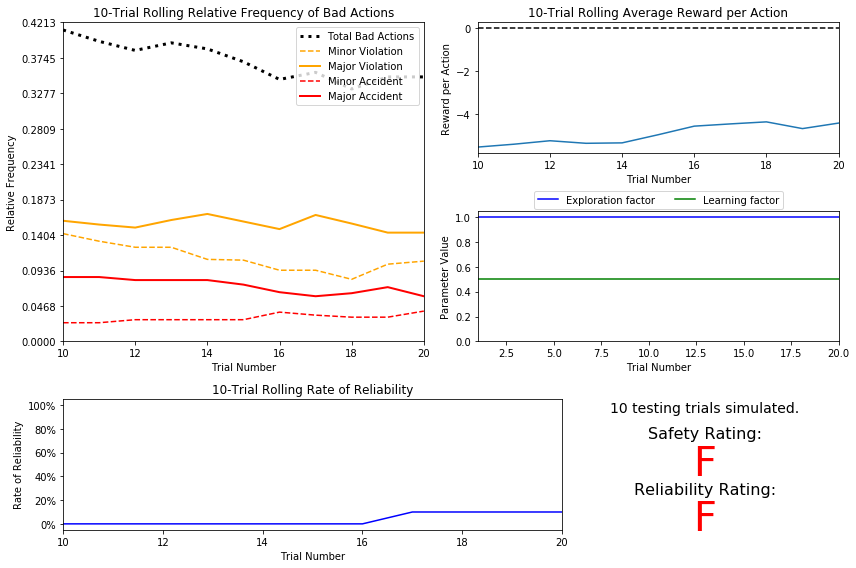

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('C:\Users\skufeld\machine-learning-master\smartcab\smartcab\logs\sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- The driving agent was making bad decisions at a rate of about 42% at the beginning of the trail phase. This number dropped to circa 35 percent at the end of the trail run. This driving behaviour results in 8 to 5 percent major accidents.
- The rolling rate of reliability starts off with 0% and increases up to 10% to the end of the test phase. This is plausible, since even driving randomly will eventually result in the cab reaching the destination in time. This means the cab is late more than 60% of the time resulting in a F rating for reliability.
- The rolling average reward per action varies between -6 and the beginning and -4 at the end of the test phase. This is consistent with the drop in major accidents towards the end of the test phase. The rewards do not suggest it has been penalized heavily, since some of the random actions are not considered "bad actions".  
- As the number of trails increases, the rolling rate of bad actions decreases slightly. This can be attributed to the law of large numbers which suggests that this rate will eventually stabilize. In this case it seems that choosing actions randomly will result in an F rating in safety in the long run. The same is true for the reliability rating in this environment setup. Driving randomly will result in about 10% of destinations reached in time.
- Since both of the ratings are an F, the smartcab is not considered safe nor reliable.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
### relevant features for safety and efficiency:
- inputs/light: The information about the color of the traffic light is crucial for the agent to learn to associate driving a red light leads to negative rewards. This way many "bad decisions" and ultimately minor/major violations can be avoided. This increases the safety rating.
- inputs/left: The information whether a car is present to the left and where it is headed is also important to the agent to avoid violations. For example if the agent want to turn right on a red light, it may do so safely if ether no car to the left is present or it is not headed straight.
- inputs/oncoming: The information about the car across the intersection is also important to avoid violations. In the case the agent wants to turn left and there is a car present across the intersection, the agent has to refrain from driving if the other car want to drive in the same street.
- waypoint: This feature gives the agent the information where to drive to move into the direction of the destination. Here the agent can learn to (roughly) associate following the direction in the waypoint feature with arriving on time.  

### not appropriate features:
- inputs/right: The information about the car to the right hand side of the agent is on the other hand not necessary or even helpfull. If the agent has green light, it can act regardless what the car to the right may do. If the agent has red light, it still may turn right and do so regardless of whether there is a car on the right and its intent.
- deadline: The feature deadline, which represents the number of remaining actions for the smartcab before the time is up, is not necessary for the learning of the agent. The agent should learn to decide optimally regardless of the time remaining.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
Feature number:
1. inputs/light - Number of states = 2 (green, red)
2. inputs/oncoming - Number of states = 4 (None, left, right, forward)
3. inputs/left - Number of states = 4 (None, left, right, forward)
4. waypoint - Number of states = 3 (left, right, forward)
   
Since all of the features are independent from one and another, the number of possible situations is the product of all possible states: 2x4x4x3 = 96. The full state space in which the agent is able to explore is 4 times 96 (=384), because it can choose from one of four actions (None, left, right, forward). Here learning depends on the learning rate, but I think the agent roughly needs to be able to receive a reward at least once in each state to be able to learn. So after some 3.800 situations, the agent propably has been into every situation and was able to receive the according reward. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

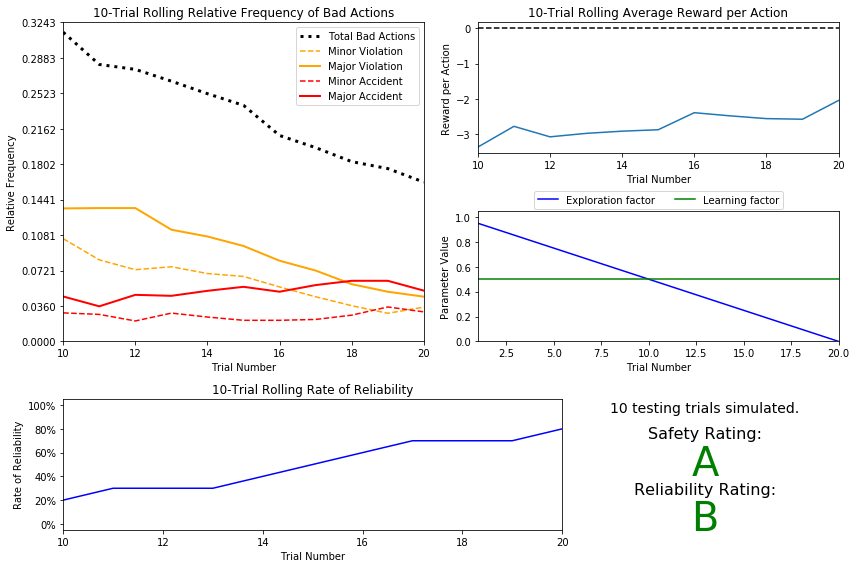

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('C:\Users\skufeld\machine-learning-master\smartcab\smartcab\logs\sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**  
- When comparing the basic agent's results from before (no learning) to this agent with a simple learning systematic one can immediately see the changes in terms of safety and reliability. Both ratings improved drastically, safety from rating F to A and reliability from F to B, respectively. Having run the simulation several times, it has to be mentioned, that the results vary vastly. One similarity is that both agents start off with a high relative (rolling) frequency of total bad actions (43% vs 32%) which decreases with increasing trail numbers. But the reasons for this are not the same. In the case of the basic agent, the results converged to the expectation and in the second case, learning also was involved, thus decreasing the relative (rolling) frequency of total bad actions even more. The same behaviour applies in context of the Rate of Reliability and Average Reward per Action.
- There are 20 training trails before the agent gets tested. This makes sense because epsilon is initialized with 1 and is reduced by .05 each trail. The epsilon-tolerance is at 0.05 and stops training when it is undershot, resulting in 20 not 19 training trails.
- The exploration factor linearly decreases from 1 to 0 within the 20 training trails, as shown in the parameters panel.
- With increasing training trails the relative (rolling) frequency of bad actions decreases and similarly the average reward per action increased.
- Both safety and reliability increased as mentioned above.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

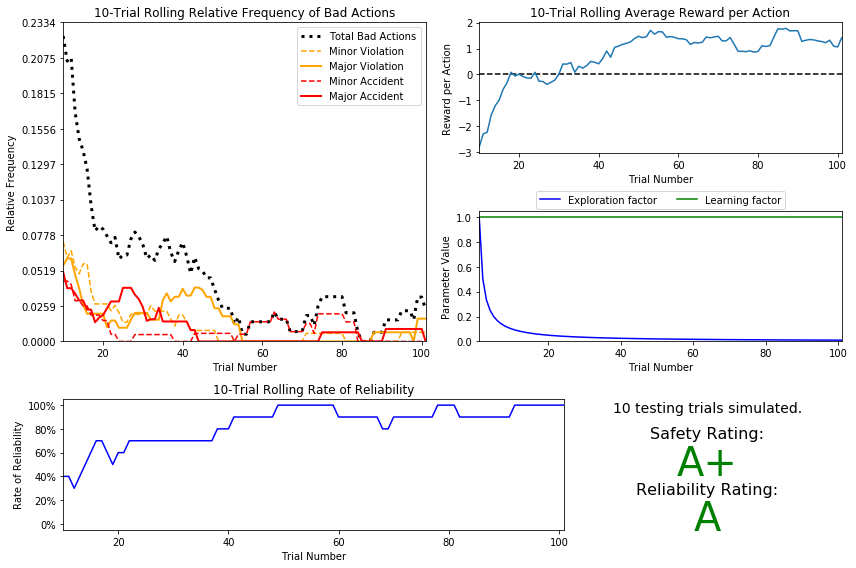

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('C:\Users\skufeld\machine-learning-master\smartcab\smartcab\logs\sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- The decaying function used for epsilon is : self.epsilon = 1 / (self.t), with t as number of trails
- The agent was run 10 trailes before testing began.
- I chose the default epsilon-tolerance of .01 because this way, the number of trails was expanded to 100. For  alpha, the learning rate, I chose the maximum allowed value of 1. I made that decision because the rewards in this case are a deterministic function of the state. Discounting the rewards would just result in successive approximation in each update step, which is not necessary.
- This agent was able to quickly reduce the (rolling relative) frequency of bad decisions to about 8% within 20 trails, which can be compared to approx. 18% in the previous agent's case. At the end of the total trail runs of 100 this number even reduced to about 3%. The rolling average reward per action increases drastically to ca 0 within the first 20 trails. This can be compared to about -2 average reward in the previous case. But due to the additional number of trails this agent is able to achieve nearly 2 as the average reward per action. The rate of reliability reaches about 70% within the first 20 trails, but temporarily drops to about 50%. Here, the precious agent performs better with about 80% reliability at the end of 20 trails. In this case, too, the current agent has the advantage of more trails and by the end is able to reach approx. 95% of reliability.
- I think that the agent has learned an appropriate policy, although it is probable that there are still some (rare) cases, that the agent did not encounter often enough (especially in the early stage with high epsilon) to learn the correct action.
- I am satisfied with the reliability rating and the safety rating, since some chance is involved in the testing and it is therefore hard to have a perfect record. Nevertheless there are some options left for improvement. For example, some adaptions in the model could be sensible, such as giving the agent some prior knowledge for example setting the rewards for action None in default to 1. Also taking the known Q-values (and the maximal possible rewards) into account when deciding between exploration/exploitation. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**  
### 1.
optimal policy in the form of:  
[waypoint, light, oncoming, left] -> [optimal action]    

**light green**  
[forward, green, any, any] -> [forward]  

[right, green, any, any] -> [right]  

[left, green, right, any] -> [None]  
[left, green, forward, any] -> [left]  
[left, green, left, any] -> [left]  
**light red**  
[forward, red, any, any] -> [None]  
[left, red, any, any] -> [None]  

[right, red, any, forward] -> [None]  
[right, red, any, left] -> [right]  
[right, red, any, right] -> [right]  
### 2.
The agent did not (yet) learn the optimal action for of the all states. The policy is suboptimal in several states documented in the sim_improved-learning text file. Some of these cases are discussed below. 
One can find some states there all of the q-values are zero, where the agent would pick a random action in whose cases (suboptimal). One example is:  

[forward, red, None, right]  
 forward : 0.00  
 right : 0.00  
 None : 0.00  
 left : 0.00  
  
In other cases, the highest q-values does not correspond to the optimal action (as described above). Here is a non complete list with these state and their respective action with the highest q-value: 
[forward, green, left, left]  
 left : 0.55  
[right, green, foward, forward]  
 forward : 0.34  
[left, green, forward, forward]  
 forward : 0.92  
[right, red, None, right]  
 right : 0.89  
[left, green, left, right]  
 forward : 0.61  
### 3.  
Here are some examples where the learned policy of the agent matches the optimal strategy:  
[right, green, None, forward]   
 forward : 0.00
 right : 1.21
 None : -2.12
 left : 0.00
This action (example above) is optimal because the agent is supposed to go right. He has the green light, thus the way of right and max(q-value) is indeed action 'right'.  
[forward, green, None, None]  
 forward : 1.35
 right : -0.20
 None : -5.27
 left : 0.48
In the example above the action with the highest q-value ist 'forward', which is also the optimal policy in this state/situation.  
### 4.   
I'll look at the following entry in the agent's policy:  
[left, green, None, right]   
 forward : 0.00  
 right : 0.36  
 None : -2.58  
 left : 0.00  
   
In this case (state), the q-values were initialized as 0 and the action 'right' was taken by the agent by chance. This action resulted in a positive reward thus its q-value increased (learning rate = 1). Some other time in the same sitution, the agent chose the action 'None' which resulted in a negative reward, so the correspondant q-value was updated to a negative value. It seems that this situation was not again encountered, while the exploration factor allowed for frequent random actions. This resulted in this suboptimal q-value distribution within this state.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**  
One reason that discounting future rewards does not work in this setting is, in my optinion, the fact that the agent receives immediate rewards when choosing an action. This rewards not only include penalties for accidents (or bad decisions), but also rewards for taking the correct action, for example turning in the direction of the destination. If the reward (or incentive) for this correct behavior was only given when the destination was reached in time, discounting it for the actions taken leading up to this event would be sensible. For this to work, instead of giving the agent the input of next_waypoint it would need some information of the position of the destination and it's own position (or the delta between those two points).

Another reason, I think, lies in the way the agent defines the states. It simly combines all environment states to a distinct situation. Introducing delta values (representing the discrepancy between the current location and the destination) in conjunction with those states would dramatically increase the state space, resulting in slower learning. The agent must define states in an hierarchical way to be able, for example, to learn that turning left is generally a good action if the destination is located to the left. The literal values for the location or delta in locations (between destination and itself) are not important.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.